In [3]:
import networkx as nx
from uccgGenerator import tree_insertion
from plotNetwork import plotGraph
import random
import matplotlib.pyplot as plt
from itertools import combinations, permutations
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
from matplotlib.patches import ArrowStyle
from networkx.algorithms.approximation.treewidth import *
from networkx.algorithms.dag import *
from functools import partial

In [4]:
res = 'res'
sep = 'sep'
label = 'I'
status = 'status'
I_edge = 'I_edge'
F_edge = 'F_edge'
common_edge = 'common_edge'
in_current = 'in_current'

connectionstyle = 'arc3, rad=0.1'
node_size = 300
color = 'white'
font_size = 13
alpha=1
width = 2

In [5]:
def current_graph(IF):
    current_edges = [e for e in IF.edges if IF.edges[e][in_current]]
    dg = nx.DiGraph()
    dg.add_edges_from(current_edges)
    return dg

In [6]:
def plot_edges(IF, pos, edges):
    if len(edges) == 0:
        return
    e = edges[0]
    is_in_current = IF.edges[e][in_current]
    color = {I_edge: 'b', F_edge: 'r'}[IF.edges[e][label]]
    width = {True: 1.5, False: 1}[is_in_current]
    style = {True: 'solid', False: 'dotted'}[is_in_current]
    alpha = {True:1, False:0.5}[is_in_current]
    nx.draw_networkx_edges(IF, pos, edges, edge_color=color, alpha=alpha, width=width, connectionstyle=connectionstyle)

In [7]:
def get_sep_and_res(rt, u):
    predecessors = set(rt.predecessors(u))
    parent = list(predecessors)[0] if len(predecessors) > 0 else None
    rt.nodes[u][sep] = u.intersection(parent) if parent else set()
    rt.nodes[u][res] = u - rt.nodes[u][sep]
    for v in rt.successors(u):
        get_sep_and_res(rt, v)

In [8]:
def find_cycles(g):
    pass

In [9]:
a = set()

In [10]:
a.update([1,2,3])
a

{1, 2, 3}

In [11]:
def resample(g, cycles):
    edges_to_resample = set()
    for a, b, c in cycles:
        edges_to_resample.update([(a, b), (b, c), (c, a)])
    for x, y in edges_to_resample:
        flag = random.randint(0, 1)
        if flag == 0:
            continue
        # flip
        g.remove_edge(x, y)
        g.add_edge(y, x)

In [12]:
def get_cycles_3(g):
    return [c for c in nx.simple_cycles(g) if len(c)==3]

In [52]:
g = tree_insertion(8, 15)
dg = nx.DiGraph()
for u, v in g.edges:
    a = random.randint(0, 1)
    if a == 0:
        dg.add_edge(u, v)
    else:
        dg.add_edge(v, u)

In [53]:
is_directed_acyclic_graph(dg)

False

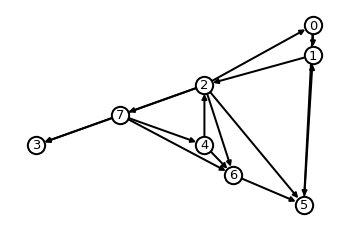

In [54]:
pos = nx.kamada_kawai_layout(dg)
pos = graphviz_layout(dg, prog='dot')
plotGraph(dg, pos)

In [55]:
cycles = get_cycles_3(dg)
i = 0
while len(cycles) > 0:
    i += 1
    print(list(cycles))
    resample(dg, cycles)
    cycles = get_cycles_3(dg)
print(i)

[[0, 1, 2], [1, 2, 5], [2, 7, 4]]
[[2, 7, 4]]
2


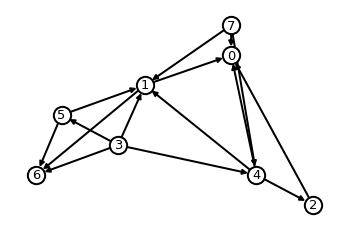

In [47]:
plotGraph(dg, pos)

In [ ]:
for u, v in g.edges:
    